In [48]:
import opendatasets as od
import pandas as pd
import numpy as np

In [3]:
od.download("https://www.kaggle.com/datasets/at3191/us-car-prices")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kimberlyhall04
Your Kaggle Key: ········


100%|██████████| 272k/272k [00:00<00:00, 1.19MB/s]

In [14]:
cars =  pd.read_csv("C:/Users/kimbe/OneDrive/Desktop/DATA SCIENCE/ThinkStats2-master/car_prices.csv")

In [15]:
print(cars)

           make   model  year  mileage  price   color state  \
0     Chevrolet   Cruze  2011    99157  37488   white    TX   
1        Toyota   Cruze  2017    19882  34176     red    IL   
2     Chevrolet  Altima  2011    77718  40297    blue    CA   
3        Nissan  Fusion  2012    83613  43492  silver    TX   
4          Ford   Cruze  2016    95349  26655     red    NY   
...         ...     ...   ...      ...    ...     ...   ...   
9995      Honda  Altima  2017    25154  43139     red    FL   
9996  Chevrolet  Accord  2017    68264  15632   white    TX   
9997     Nissan   Cruze  2016    17417  30832  silver    IL   
9998      Honda  Accord  2011    68878  10801    blue    TX   
9999  Chevrolet   Cruze  2010    99313  31827   black    CA   

                            date  
0     2023-09-26 23:02:01.647970  
1     2023-08-08 23:02:01.648413  
2     2023-02-25 23:02:01.648422  
3     2023-04-25 23:02:01.648425  
4     2023-12-14 23:02:01.648426  
...                          ... 

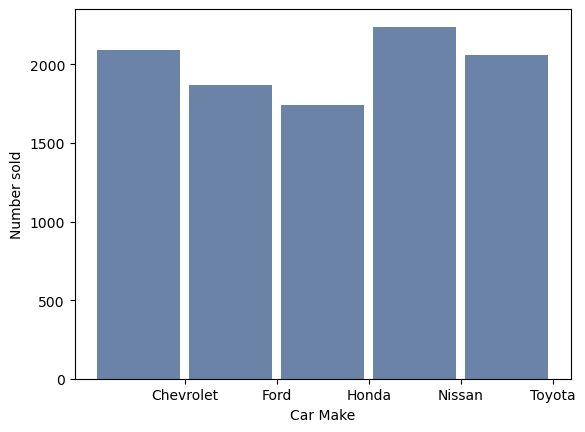

<Figure size 800x600 with 0 Axes>

In [19]:
import thinkplot
import thinkstats2
cars_make= thinkstats2.Hist(cars.make)
thinkplot.Hist(cars_make)
thinkplot.Show(xlabel='Car Make', ylabel='Number sold')

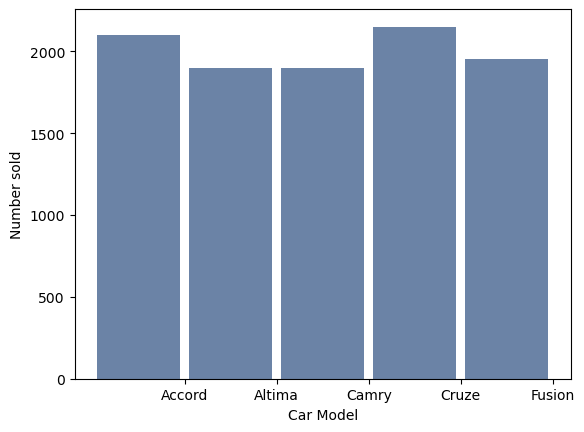

<Figure size 800x600 with 0 Axes>

In [20]:
cars_model= thinkstats2.Hist(cars.model)
thinkplot.Hist(cars_model)
thinkplot.Show(xlabel='Car Model', ylabel='Number sold')

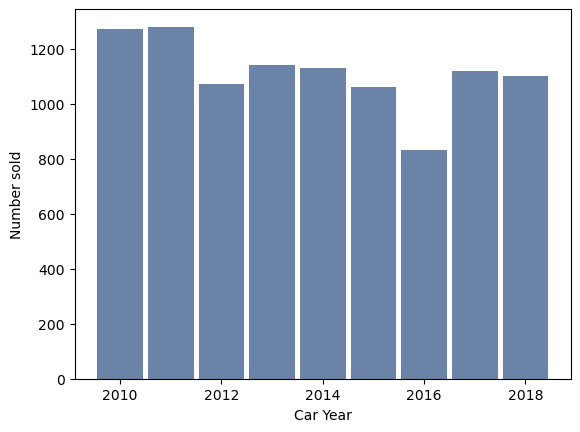

<Figure size 800x600 with 0 Axes>

In [21]:
cars_year= thinkstats2.Hist(cars.year)
thinkplot.Hist(cars_year)
thinkplot.Show(xlabel='Car Year', ylabel='Number sold')

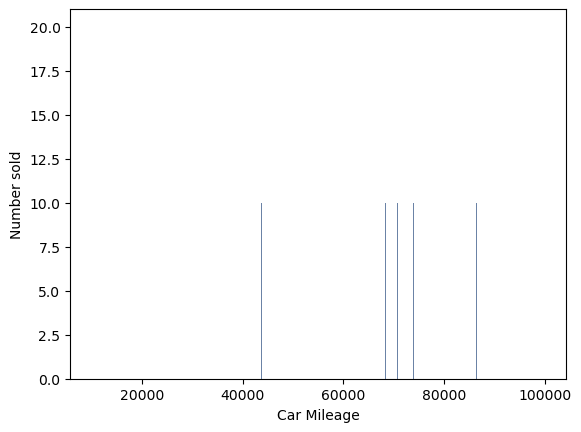

<Figure size 800x600 with 0 Axes>

In [22]:
cars_mileage= thinkstats2.Hist(cars.mileage)
thinkplot.Hist(cars_mileage)
thinkplot.Show(xlabel='Car Mileage', ylabel='Number sold')

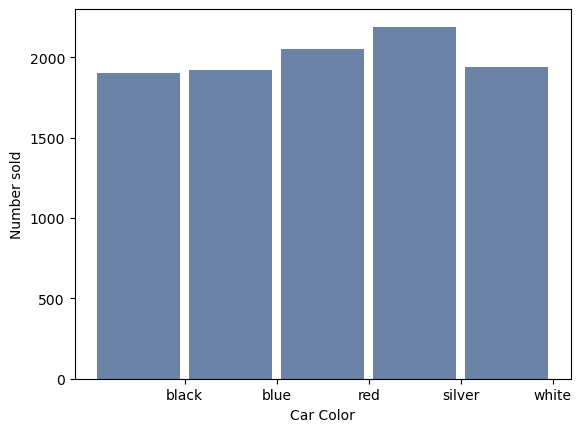

<Figure size 800x600 with 0 Axes>

In [23]:
cars_color= thinkstats2.Hist(cars.color)
thinkplot.Hist(cars_color)
thinkplot.Show(xlabel='Car Color', ylabel='Number sold')

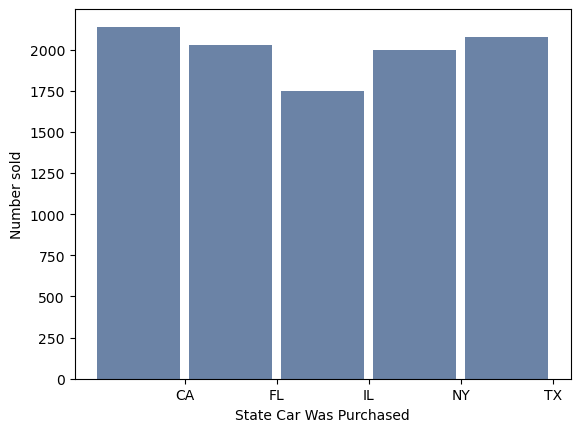

<Figure size 800x600 with 0 Axes>

In [24]:
cars_state= thinkstats2.Hist(cars.state)
thinkplot.Hist(cars_state)
thinkplot.Show(xlabel='State Car Was Purchased', ylabel='Number sold')

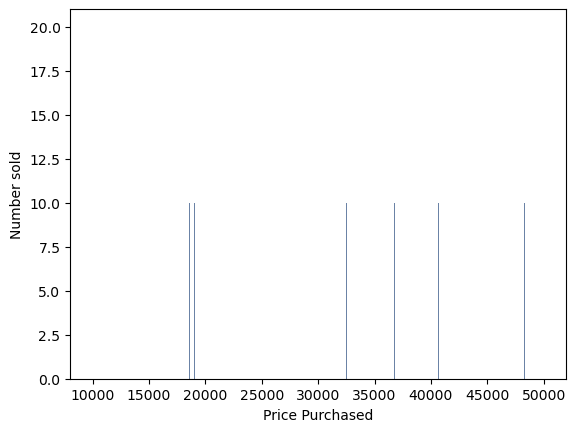

<Figure size 800x600 with 0 Axes>

In [35]:
cars_price= thinkstats2.Hist(cars.price)
thinkplot.Hist(cars_price)
thinkplot.Show(xlabel='Price Purchased', ylabel='Number sold')

In [31]:
cars.price.mean()

29376.222

In [32]:
cars.price.mode()

0    12151
1    14998
2    22058
3    36333
4    43827
5    45041
Name: price, dtype: int64

In [39]:
cars.price.max() - cars.price.min()
#Spread

39976

In [36]:
cars.mileage.mode()

0    14612
1    14718
2    30864
3    39523
4    43679
5    58468
6    91489
Name: mileage, dtype: int64

In [40]:
cars.mileage.mean()

55798.059

In [41]:
cars.mileage.max() - cars.mileage.min()

89499

In [ ]:
#Both the mileagae and price histograms have short tails.

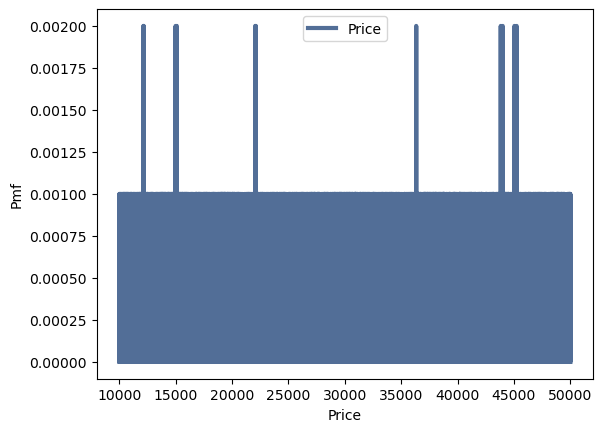

In [52]:
#PMF
pmf = thinkstats2.Pmf(cars.price, label="Price")
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Price", ylabel="Pmf")

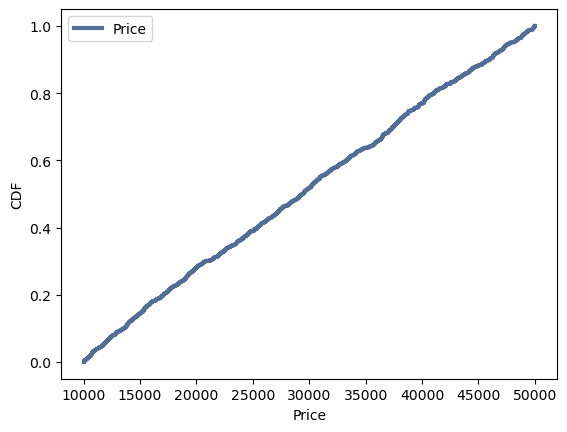

<Figure size 800x600 with 0 Axes>

In [53]:
#CDF
cdf= thinkstats2.Cdf(cars.price, label='Price')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Price', ylabel='CDF')

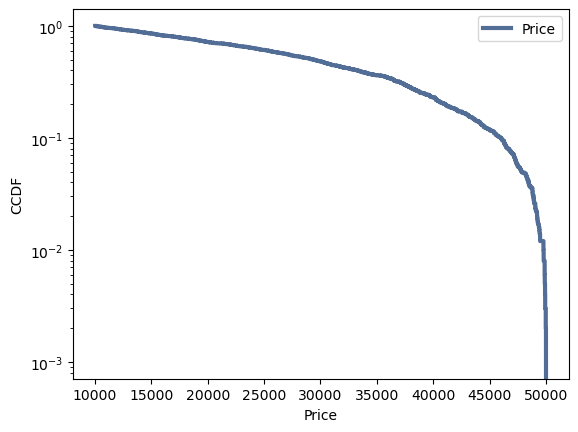

<Figure size 800x600 with 0 Axes>

In [55]:
#Complementary CDF
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Price',
               ylabel='CCDF',
               yscale='log')

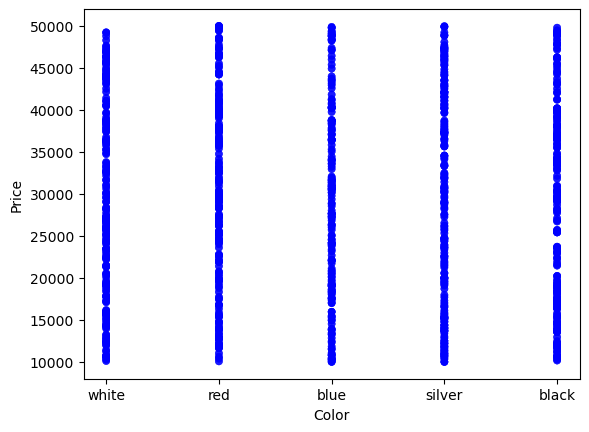

<Figure size 800x600 with 0 Axes>

In [60]:
#Scatterplot
color_s= cars.color
price_s= cars.price
thinkplot.Scatter(color_s, price_s)
thinkplot.Show(xlabel='Color',
               ylabel='Price')

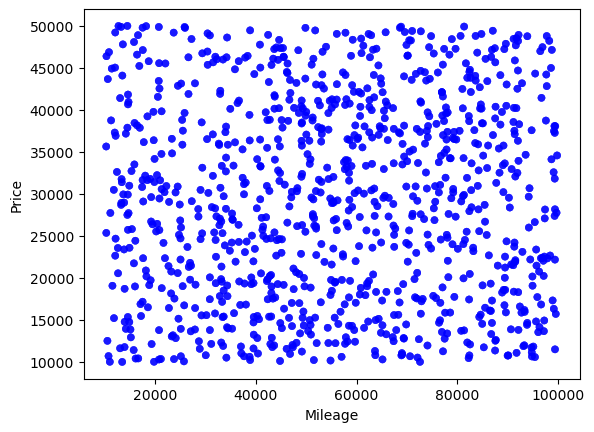

<Figure size 800x600 with 0 Axes>

In [65]:
#Scatterplot
mileage_s= cars.mileage
price_s= cars.price
thinkplot.Scatter(mileage_s, price_s)
thinkplot.Show(xlabel='Mileage',
               ylabel='Price')

In [86]:
#Hypothesis Testing
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [87]:
class CarTest(HypothesisTest):

    def TestStatistic(self, data):
        price_s, mileage_s = data
        test_stat = abs(price_s - mileage_s)
        return test_stat

    def RunModel(self):
        price_s, mileage_s = self.data
        n = price_s + mileage_s
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

In [67]:
#Least Squares
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [68]:
inter, slope = LeastSquares(price_s, mileage_s)
inter, slope

(53548.48119191814, 0.07657818653746093)

In [70]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [73]:
fit_xs, fit_ys = FitLine(price_s, inter, slope)

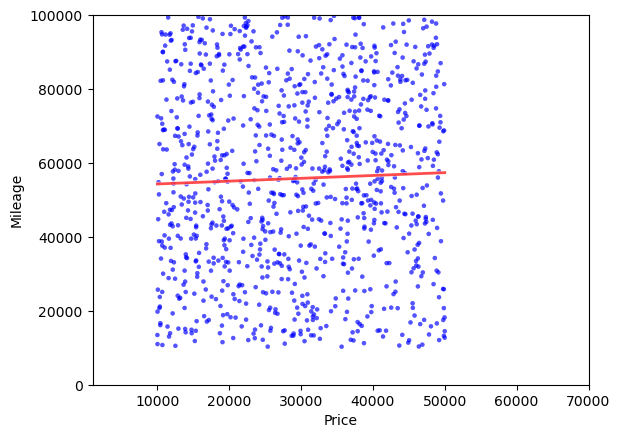

In [84]:
thinkplot.Scatter(price_s, mileage_s, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Price",
                 ylabel='Mileage',
                 axis=[1000, 70000, 0, 100000],
                 legend=False)